# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
import tweepy 
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
from IPython.display import Image
plt.style.use('seaborn')

%matplotlib inline

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# creating a folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name) 

In [4]:
# creating a request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# assessing the content
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#!pip install tweepy

In [8]:
""""
import tweepy
import json

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
"""

'"\nimport tweepy\nimport json\n\nconsumer_key = \'\'\nconsumer_secret = \'\'\naccess_token = \'\'\naccess_secret = \'\'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth)\n'

In [9]:
"""# use Twitter API to collect status data on tweets present in archive
tweet_data = []
tweet_id_success = []
tweet_id_missing = []
start = timer()
for tweet_id in tweet_archive['tweet_id']:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended') 
        tweet_id_success.append(tweet_id)
        
    except Exception as e:
        tweet_id_missing.append(tweet_id)
        print(f'{tweet_id}: {e}')
        
end = timer()
print(end - start) 
"""

"# use Twitter API to collect status data on tweets present in archive\ntweet_data = []\ntweet_id_success = []\ntweet_id_missing = []\nstart = timer()\nfor tweet_id in tweet_archive['tweet_id']:\n    try:\n        data = api.get_status(tweet_id, tweet_mode='extended') \n        tweet_id_success.append(tweet_id)\n        \n    except Exception as e:\n        tweet_id_missing.append(tweet_id)\n        print(f'{tweet_id}: {e}')\n        \nend = timer()\nprint(end - start) \n"

In [10]:
"""
# Write tweet data to json file line by line
import json
with open('tweet-json.txt', mode = 'w') as outfile:
    for tweet in tweet_data:
        json.dump(tweet._json, outfile)
        outfile.write('\n')
"""        

"\n# Write tweet data to json file line by line\nimport json\nwith open('tweet-json.txt', mode = 'w') as outfile:\n    for tweet in tweet_data:\n        json.dump(tweet._json, outfile)\n        outfile.write('\n')\n"

In [11]:
# Load the Twitter API data
api_data = pd.read_json('tweet-json.txt', lines=True)
api_data.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [12]:
api_data = api_data[['id', 'favorite_count', 'retweet_count']]
api_data.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [13]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
api_data

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Programmatic Assessment

> 1. **Assessing Tweet Archive** 

In [16]:
# shape of data (number of columns and rows)
tweet_archive.shape

(2356, 17)

In [17]:
# Check datatypes and columns
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# Checking for missing values
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# data statistics
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Checking for duplicates (using tweet_id column)
tweet_archive['tweet_id'].duplicated().sum()

0

#### rating

In [21]:
print(tweet_archive['rating_denominator'].value_counts())

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64


In [22]:
# Checking standard rate denominator (should be 10)
tweet_archive.query('rating_denominator != 10').describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.300000e+01,5.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,23.000000,23.000000
mean,7.269089e+17,7.440758e+17,2.529559e+09,7.403732e+17,4.196984e+09,103.304348,56.652174
std,5.322952e+16,8.180072e+16,2.283217e+09,NaN,NaN,195.775715,51.158940
min,6.662874e+17,6.827884e+17,2.625958e+07,7.403732e+17,4.196984e+09,1.000000,0.000000
25%,6.842243e+17,6.842229e+17,3.058208e+07,7.403732e+17,4.196984e+09,10.000000,13.000000
50%,7.106587e+17,6.860340e+17,4.196984e+09,7.403732e+17,4.196984e+09,50.000000,50.000000
75%,7.494202e+17,8.320875e+17,4.196984e+09,7.403732e+17,4.196984e+09,110.000000,85.000000
max,8.352464e+17,8.352460e+17,4.196984e+09,7.403732e+17,4.196984e+09,960.000000,170.000000


In [23]:
# first tweet of every possible value of rating denominator
denominator = tweet_archive['rating_denominator'].value_counts()
for i, j in enumerate(denominator.index):
    print(f"{i}. rating denominator = {j}: {tweet_archive.loc[tweet_archive['rating_denominator'] == j, 'text'].values[0]}")

0. rating denominator = 10: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1. rating denominator = 11: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2. rating denominator = 50: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
3. rating denominator = 20: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4. rating denominator = 80: Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
5. rating denominator = 0: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
6. rating denominator = 120: IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
7. rating denominator = 7: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindee

> From the sample of first tweets of every possible value of rating denominator, we observe that some recorded ratings were actully not ratings. For example, tweet (1) has 11 recorded as its rating denominator but the actual rating was 14/10 which makes 10 the rating denominator. In this example 9/11 is just a fraction within the tweet and it was mistaken to be a rating. The same mistake was made with tweets (2, 3, 5, 7, 13, 15). However, with tweets (7, 15) there are no ratings at all for these tweets. On the other hand, other rating denominators are just not the standard rating denominator 10, for instance, tweet (4) was rated 80/80.

In [24]:
print(tweet_archive['rating_numerator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64


In [25]:
# first tweet of every possible value of rating numerator
numerator = tweet_archive['rating_numerator'].value_counts()
for i, j in enumerate(numerator.index):
    print(f"{i}. rating numerator = {j}: {tweet_archive.loc[tweet_archive['rating_numerator'] == j, 'text'].values[0]}")

0. rating numerator = 12: This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
1. rating numerator = 11: Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
2. rating numerator = 10: @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
3. rating numerator = 13: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
4. rating numerator = 9: RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
5. rating numerator = 8: RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
6. rating numerator = 7: I was going to do 007/10, but the joke wasn't worth the &lt;10 r

> From all the fractions within tweets mistaken to be ratings, their incorrect rating denominators are accompanied by corresponding incorrect numerators. Also, some rating numerators are decimals and the only recorded number as a rating numerator is the number after the decimal point. We assume the decimal points might have been mistaken to be periods.

#### name

In [26]:
# Checking names and their value counts
tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Brandi       1
Tobi         1
Glenn        1
this         1
Grey         1
Name: name, Length: 957, dtype: int64

> Some names start with lowercase letter, for example "a, old", and those are not actual names.

In [27]:
# Listing names starting with a lowercase letter for observation
lowercase_names = []
for name in tweet_archive['name']:
    if name[0].islower() and name not in lowercase_names:
        lowercase_names.append(name)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [28]:
# listing names starting with a uppercase letter for observation
uppercase_names = []
for name in tweet_archive['name']:
    if name[0].isupper() and name not in uppercase_names:
        uppercase_names.append(name)
print(uppercase_names)

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Jordy', 'Milky', 'Trooper', 'Winston'

> All names starting with lowercase letter are definitely not actaul dog names, the names must have been missing in this came. All other names with uppercase first letter are names except that "None" is mistaken to be a name too.

#### Dog stages

In [29]:
# Checking dog stages
tweet_archive['doggo'].value_counts(), tweet_archive['floofer'].value_counts(), tweet_archive['puppo'].value_counts(), tweet_archive['pupper'].value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64)

> There is no need for four columns of four different dog stages since they are just categories

> **2. Assessing tweet image predictions**

In [30]:
# checking images predictions shape
images.shape

(2075, 12)

In [31]:
# Check datatypes, columns and data counts
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# Checking for duplicate tweet id
images['tweet_id'].duplicated().sum()

0

In [33]:
# Checking for duplicate image url
images['jpg_url'].duplicated().sum()

66

In [34]:
# Checking for missing samples
len(tweet_archive) - len(images)

281

> **Assessing Twitter API Data**

In [35]:
# checking images predictions shape
api_data.shape

(2354, 3)

In [36]:
# Check datatypes, columns and data counts
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
# Checking for duplicate tweet id
api_data['id'].duplicated().sum()

0

In [38]:
# Checking for missing samples
len(tweet_archive) - len(api_data)

2

### Quality issues
#### Twitter Archive
1. Datatypes: Tweet_id is an interger instead of string, Timestamp is an object which is also a string instead of datetime

2. Archive data contains retweets

3. Rate numerator and denominator columns have invalid values. For example, rate denominator column has values which are not equal to the standard value 10.

4. Name column has values that are string 'None' instead of NaN to represent missing data. Some values have unusual names such as 'getting' and one character names such as 'a' and all start with lowercase.

5. In other several columns, null objects (missing entries) are non-null, with values "None" instead of NaN. For examples, the dog stages columns.

#### Image Predictions

6. There are missing images in the predictions. Only 2075 rows instead of 2356.

7. The jpg_url column contains duplicates

8. Column p1, p2 and p3 entries are strings separated by underscores. 


#### Twitter API

9. The id column is named id instead of tweet_id

10. id is an integer instead of a string


### Tidiness issues
1. The three dataframes should be combined into one dataframe

2. The four columns doggo, flooffer, puppo, pupper should have been one column named "dog stages".

3. There are columns which can be dropped off from the three dataframes.

4. Some column names lack proper description, e.g text and timestamp. The columns could have been named "tweet" and "tweet_date", respectively.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
archive_clean = tweet_archive.copy()
images_clean = images.copy()
api_clean = api_data.copy()

## Tidiness 
### Issue #1: Merge the three dataframes

#### Define
>Combine the three dataframes into one using the twitter_id column. The api_data has id column so we will rename that column first. Also, merging the dataframes before anything else helps to clean one dataframe over three dataframes separately.

#### Code

In [40]:
#************** Quality issue #9 ***************************
api_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)
api_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853


In [41]:
twitter1 = pd.merge(archive_clean, images_clean, how = 'left', on = ['tweet_id'] )
twitter = pd.merge(twitter1, api_clean, how = 'left', on = ['tweet_id'])

#### Test

In [42]:
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


In [43]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [44]:
# Checking for duplicate entries
twitter['tweet_id'].duplicated().sum()

0

### Issue #2: Create one column for the dog stages

#### Define
>The four dog stages columns will be merged into one column because dog stages are unigue, a dog can only be in one stage so there are no overlaps. Thus, it is efficient and tidy to create one column.

#### Code

In [45]:
""" 
Reference : Pandas documentation - pandas.melt
"""
# Filter out all columns that will not be melted
main_columns = [x for x in twitter.columns.tolist() if x not in ['doggo', 'floofer', 'pupper', 'puppo']]

# melt the the columns into values of a new column dog_stage
twitter = pd.melt(twitter, id_vars = main_columns, value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                         var_name = 'stages', value_name = 'dog_stages')

In [46]:
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stages,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0,doggo,None


In [47]:
# Confirming the values
twitter.dog_stages.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stages, dtype: int64

In [48]:
# delete column 'stages' and replace 'None' with NaNs
twitter = twitter.drop('stages', 1)
twitter['dog_stages'].replace('None', np.nan, inplace = True)
twitter.dog_stages.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stages, dtype: int64

In [49]:
# Check for duplicates
sum(twitter['tweet_id'].duplicated())

7068

In [50]:
# Sort and drop duplicates based on tweet_id
twitter = twitter.sort_values('dog_stages')
twitter.drop_duplicates('tweet_id', keep='first')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stages
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0,doggo
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,6620.0,2173.0,doggo
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4681.0,1608.0,doggo
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934...,...,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True,4228.0,1104.0,doggo
857,763956972077010945,7.638652e+17,15846407.0,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812.0,61.0,doggo


In [51]:
# change datatype to categorical
twitter['dog_stages'] = twitter['dog_stages'].astype("category")

#### Test

In [52]:
twitter['dog_stages'].value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stages, dtype: int64

In [53]:
twitter['dog_stages'].dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

### Issue #3: Remove columns that are not needed

##### Define
> Since retweets are already not needed in the dataset, columns which are related to the retweets column can be removed, as well as other columns which won't of any use.

#### Code

In [54]:
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'dog_stages'],
      dtype='object')

In [55]:
twitter.drop([ 'in_reply_to_status_id',
       'in_reply_to_user_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'source', 'img_num'], axis=1, inplace=True)

#### Test

In [56]:
twitter.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_id', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'dog_stages'],
      dtype='object')

### Issue #4: Change column names

#### Define
>For a better description, column names should be named accordingly.

#### Code

In [57]:
twitter.rename(columns = {'text':'tweet', 'timestamp':'tweet_date'}, inplace=True)

### Test

In [58]:
twitter.head(1)

,tweet_id,tweet_date,tweet,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stages
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0,doggo


## Quality Issues

### Issue #1: Invalid datatypes 

#### Define
>Change tweet_id dtype to object, date_time dtype to datetime.

#### Code

In [59]:
twitter['tweet_date'] = pd.to_datetime(twitter['tweet_date'])
twitter['tweet_id'] = twitter['tweet_id'].astype(object)

### Test

In [60]:
twitter.tweet_date.dtype, twitter.tweet_id.dtype

(datetime64[ns, UTC], dtype('O'))

### Issue#2:  Remove retweets
### Define
> It was stated clearly that the analysis is only interested in actual tweets not retweets. We will filter out retweets

#### Code

In [61]:
# Considering original tweets only, i.e filtering retweets from twitter data
twitter = twitter[twitter['retweeted_status_id'].isnull()]
twitter = twitter.drop(['retweeted_status_id'], axis=1)


#### Test

In [62]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 9 to 9423
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8700 non-null   object             
 1   tweet_date          8700 non-null   datetime64[ns, UTC]
 2   tweet               8700 non-null   object             
 3   expanded_urls       8468 non-null   object             
 4   rating_numerator    8700 non-null   int64              
 5   rating_denominator  8700 non-null   int64              
 6   name                8700 non-null   object             
 7   jpg_url             7976 non-null   object             
 8   p1                  7976 non-null   object             
 9   p1_conf             7976 non-null   float64            
 10  p1_dog              7976 non-null   object             
 11  p2                  7976 non-null   object             
 12  p2_conf             7976 non-null 

In [63]:
# Drop duplicates
twitter.drop_duplicates('tweet_id', keep='first', inplace=True)

In [64]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   tweet_date          2175 non-null   datetime64[ns, UTC]
 2   tweet               2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   p1                  1994 non-null   object             
 9   p1_conf             1994 non-null   float64            
 10  p1_dog              1994 non-null   object             
 11  p2                  1994 non-null   object             
 12  p2_conf             1994 non-null 

### Issue #3: Fix rating issues
#### Define
> The standard value of rates denominator is 10, some rates have denominators of 50, 170, etc. The numerator column on the other hand has decimal point rates. Some rates are missing.


#### Code

##### Rating numerator

In [65]:
import regex as re
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, tweet in twitter['tweet'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', tweet)):
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', tweet).group())

In [66]:
# Correct the decimal rating in numerator with rating numerator from text
for i in range(len(ratings_with_decimals)):
    twitter.loc[ratings_with_decimals_index[i],'rating_numerator'] = float(ratings_with_decimals[i])

##### Rating denominator

In [67]:
sum(twitter['rating_denominator'] == 'None')

0

In [68]:
# set the rating denominator as standard 10 for all ratings
twitter['rating_denominator'] = 10

In [69]:
# Add a new rating column 
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

#### Test

In [70]:
print(twitter[twitter['tweet'].str.contains(r"(\d+\.\d*\/\d+)")][['rating_numerator', 'tweet']].values)

[[11.27
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]
 [13.5
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']
 [9.75
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
 [9.5
  "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"]
 [11.26
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']]


C:\Users\21564760\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [71]:
twitter['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [72]:
twitter['rating']

9       1.4
889     1.2
881     1.2
877     1.1
857     1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2175, dtype: float64

In [73]:
max(twitter['rating'])

177.6

### Issue #4: Fix the name issues in the name column
#### Define
> We will replace missing names (None) and names starting with a lowercase character with NaN.

#### Code

In [74]:
# Replace "None" with NaN
twitter['name'].replace('None', np.nan, inplace=True)

# replace names starting with a lowercase with NaNs
twitter['name'].replace(lowercase_names, np.nan, inplace = True)


#### Test

In [75]:
for i in lowercase_names:
    print(i in twitter['name'])


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


### Issue #5: Fix missing entries "None" isssues
#### Define
> All columns with missing values represented by None will be replaces by Nan.

#### Code

In [76]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   tweet_date          2175 non-null   datetime64[ns, UTC]
 2   tweet               2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   p1                  1994 non-null   object             
 9   p1_conf             1994 non-null   float64            
 10  p1_dog              1994 non-null   object             
 11  p2                  1994 non-null   object             
 12  p2_conf             1994 non-null 

In [77]:
# Replace "None" with NaN
for column in twitter.columns:
    twitter[f"{column}"].replace('None', np.nan, inplace=True)

#### Test

In [78]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   tweet_date          2175 non-null   datetime64[ns, UTC]
 2   tweet               2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   p1                  1994 non-null   object             
 9   p1_conf             1994 non-null   float64            
 10  p1_dog              1994 non-null   object             
 11  p2                  1994 non-null   object             
 12  p2_conf             1994 non-null 

### Issue #7: Remove duplicated jpg_urls

#### Define
> Duplicated images are dropped off from the dataframe.

#### Code

In [79]:
twitter.drop_duplicates('jpg_url', keep='last', inplace=True)

#### Test

In [80]:
sum(twitter.jpg_url.duplicated())

0

### Issue #8: Remove underscores in p1, p2, and p3 entries

#### Define
> The columns contain string entries separated by underscores. For a tidy dataframe, strings are supposed to be separated by spaces.

#### Code

In [81]:
# Replace underscores with spaces 
twitter['p1'].replace('_', ' ', regex=True, inplace = True)
twitter['p2'].replace('_', ' ', regex=True, inplace = True)
twitter['p3'].replace('_', ' ', regex=True, inplace = True)

#### Test

In [82]:
twitter['p1'], twitter['p2'], twitter['p3']

(9                     Pembroke
 889           golden retriever
 877           Blenheim spaniel
 839                      patio
 835                       lion
                  ...          
 2351        miniature pinscher
 2352       Rhodesian ridgeback
 2353           German shepherd
 2354                   redbone
 2355    Welsh springer spaniel
 Name: p1, Length: 1995, dtype: object,
 9                 Cardigan
 889     Labrador retriever
 877         cocker spaniel
 839              boathouse
 835                    ram
                ...        
 2351            Rottweiler
 2352               redbone
 2353              malinois
 2354    miniature pinscher
 2355                collie
 Name: p2, Length: 1995, dtype: object,
 9                 Chihuahua
 889                  kuvasz
 877                  borzoi
 839                    pier
 835                 cheetah
                ...         
 2351               Doberman
 2352     miniature pinscher
 2353             bloodhound

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
# Save the dataframe to a csv file
twitter.to_csv('twitter_archive_master.csv')

In [84]:
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1995 non-null   int64  
 1   tweet_id            1995 non-null   int64  
 2   tweet_date          1995 non-null   object 
 3   tweet               1995 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1995 non-null   float64
 6   rating_denominator  1995 non-null   int64  
 7   name                1350 non-null   object 
 8   jpg_url             1994 non-null   object 
 9   p1                  1994 non-null   object 
 10  p1_conf             1994 non-null   float64
 11  p1_dog              1994 non-null   object 
 12  p2                  1994 non-null   object 
 13  p2_conf             1994 non-null   float64
 14  p2_dog              1994 non-null   object 
 15  p3                  1994 non-null   object 
 16  p3_con

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

### 1. Relationship between favourite count and retweet count

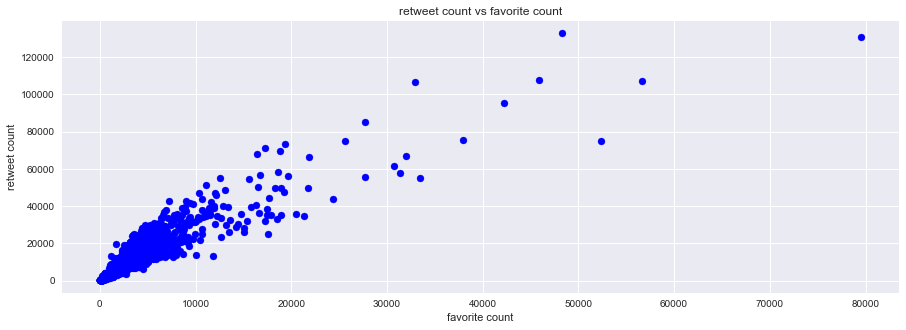

In [85]:
#plotting scatter plot
plt.figure(figsize=(15, 5))

title = plt.title('retweet count vs favorite count')
y_label = plt.xlabel('favorite count')
x_label = plt.ylabel('retweet count')
plot = plt.scatter(twitter_master['retweet_count'],
                   twitter_master['favorite_count'], color='blue')

plt.savefig('favorite_retweet.png', bbox_inches='tight')    

The scatter plot shows that there is a positive correlation between number of favorites on a tweet and the number of times a tweet was retweeted.

### 2. Top ten most common dog names

C:\Users\21564760\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


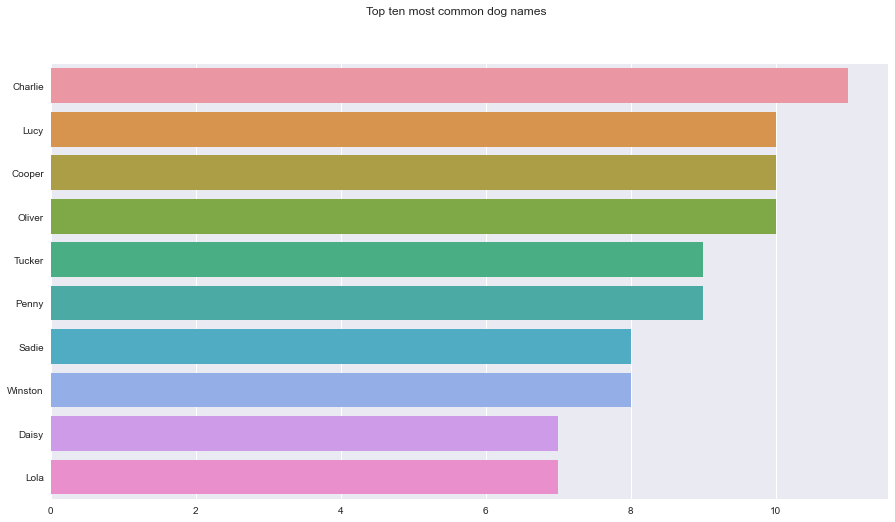

In [89]:
dog_names = twitter_master['name'].value_counts()[:10]
plt.figure(figsize = (15,8))
sns.barplot(dog_names.values, dog_names.index)
plt.suptitle('Top ten most common dog names')
plt.savefig('dog_names.png', bbox_inches='tight')  

Amongst top ten common names, Charlie is the most common dog name amongst all the recorded dog names.

### 3. Dog stages

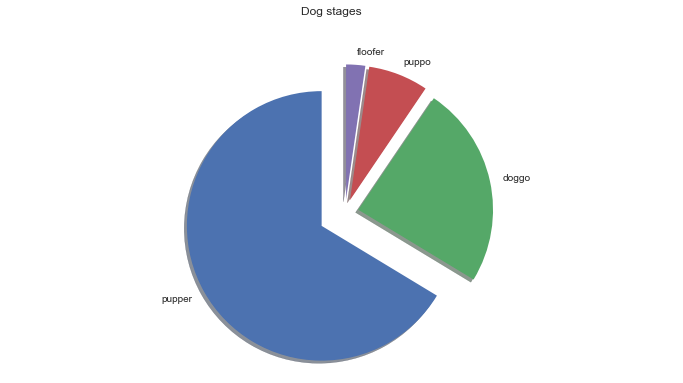

In [90]:
dog_stage_count = list(twitter_master['dog_stages'].value_counts())
dog_stages = twitter_master['dog_stages'].value_counts().index.tolist()
explode = (0.2, 0.1, 0.1, 0.1) 

plt.figure(figsize = (12,6))
plt.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
plt.axis('equal')
plt.suptitle('Dog stages')
plt.savefig('dog_stages.png', bbox_inches='tight')  

There were only four categories for dog stages with pupper being the most common stage followed by doggo.

### 4. Top ten most popular dog breeds

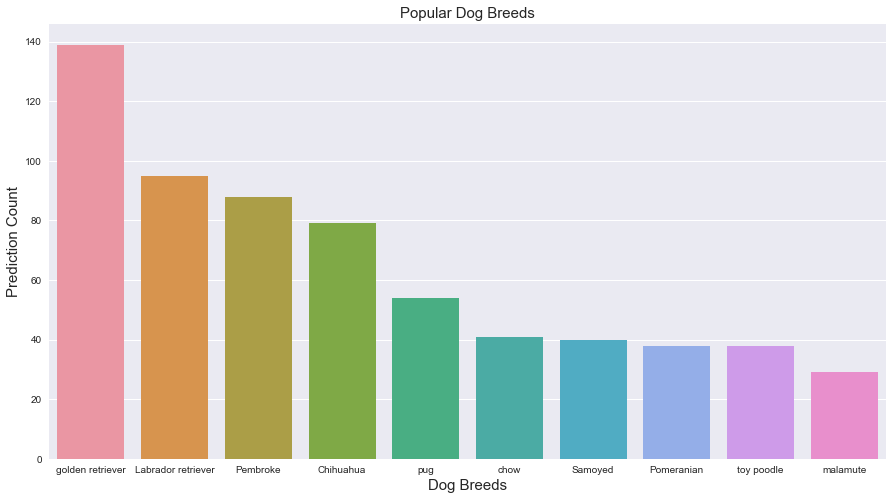

In [91]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = twitter_master['p1'].value_counts()[0:10].index,
            y = twitter_master['p1'].value_counts()[0:10],
            data = twitter_master);

plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds",fontsize = 15);
plt.savefig('dog_breeds.png', bbox_inches='tight')  

Amongst the number of recorded dog breeds, golden retriever was found to be the most popular dog breed followed by labrator retriever and pembroke.

### Visualization:

### The most popular dog breed

In [92]:
# Looking at dogs which are of the most popular breed, golden retriever
golden_ret_df = twitter_master.query('p1 == "golden retriever"')

In [93]:
golden_ret_df.sort_values('p1_conf',ascending=False).head(3)

,Unnamed: 0,tweet_id,tweet_date,tweet,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stages,rating
755,747,779834332596887552,2016-09-25 00:06:08+00:00,This is Scout. He really wants to kiss himself...,https://twitter.com/dog_rates/status/779834332...,11.0,10,Scout,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,golden retriever,...,cocker spaniel,0.003143,True,Great Pyrenees,0.000917,True,21252.0,8237.0,NaN,1.1
1817,2174,669216679721873412,2015-11-24 18:11:04+00:00,This is Clarq. He's a golden Quetzalcoatl. Cla...,https://twitter.com/dog_rates/status/669216679...,8.0,10,Clarq,https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg,golden retriever,...,Irish setter,0.003379,True,Saluki,0.001230,True,958.0,422.0,NaN,0.8
1067,1210,715680795826982913,2016-03-31 23:22:53+00:00,This is Zeus. He's downright fabulous. 12/10 h...,https://twitter.com/dog_rates/status/715680795...,12.0,10,Zeus,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,golden retriever,...,Labrador retriever,0.002228,True,chow,0.001197,True,4719.0,1813.0,NaN,1.2


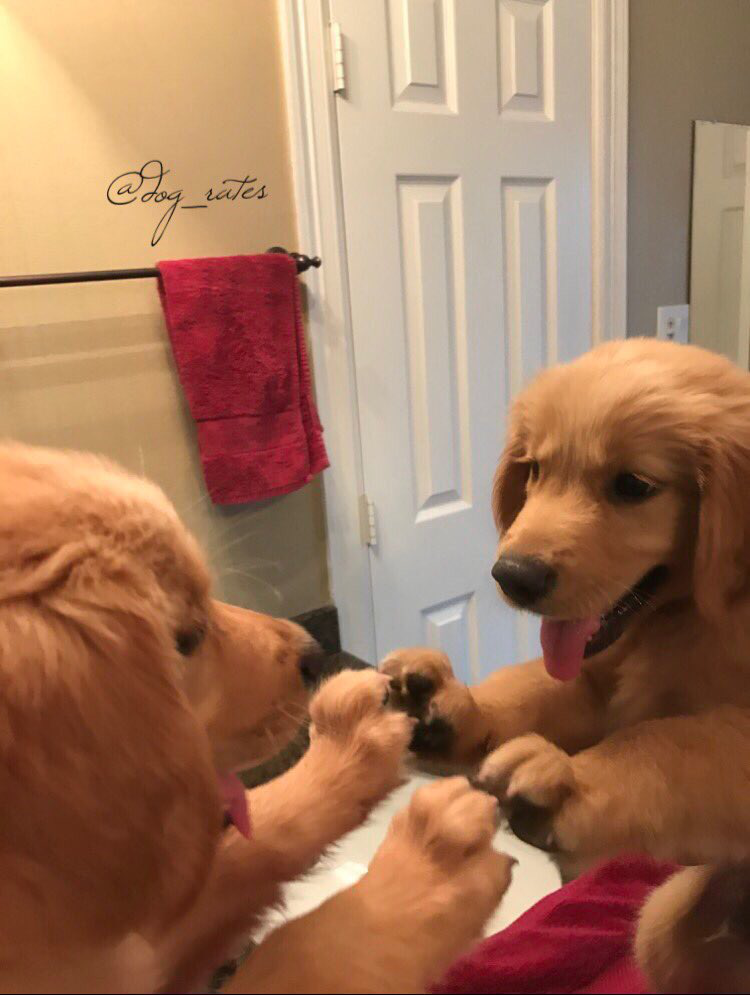

In [95]:
#The first best Golden Retriever with high confidence 
import PIL.Image
from io import BytesIO
from PIL import Image

url = twitter_master.jpg_url[755]
r = requests.get(url)
Image.open(BytesIO(r.content)) 


This is the first golden retriever and it was tweeted "This is Scout. He really wants to kiss himself...", with rating $11/10$.